In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

In [3]:
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)

In [4]:
scalar = StandardScaler()
X_scaled = scalar.fit_transform(X)

In [5]:
inertia = []
K_range = range(1, 11)

for k in K_range:
    Kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    Kmeans.fit(X_scaled)
    inertia.append(Kmeans.inertia_)

In [6]:
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    labels = kmeans.labels_
    silhouette_scores.append(silhouette_score(X_scaled, labels))

In [7]:
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
kmeans.fit(X_scaled)
labels = kmeans.labels_

In [8]:
X['Cluster'] = labels

from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
X['PCA1'] = X_pca[:, 0]
X['PCA2'] = X_pca[:, 1]

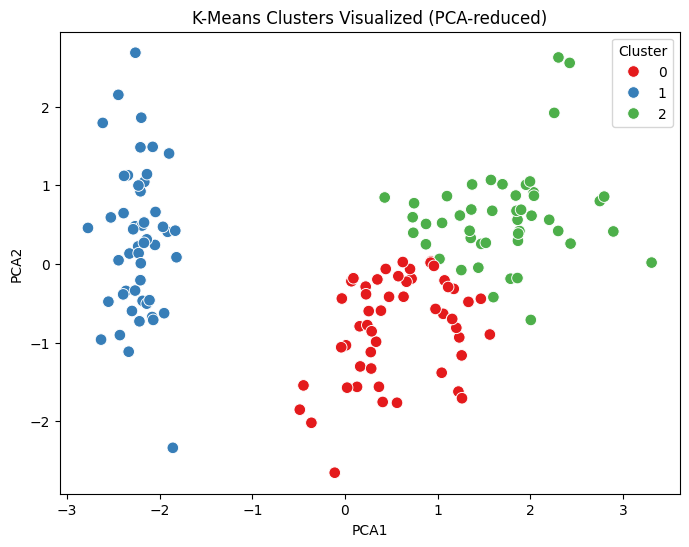

In [9]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=X, x='PCA1', y='PCA2', hue='Cluster', palette='Set1', s=70)
plt.title('K-Means Clusters Visualized (PCA-reduced)')
plt.show()